In [9]:
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
doc1 = "Machine learning is a subset of artificial intelligence. It focuses on the development of computer programs that can access data and learn from it."
doc2 = "Artificial intelligence involves the simulation of human intelligence processes by machines, especially computer systems. Machine learning is a subset of AI."


In [10]:
def preprocess(doc):
    stopwords = set(nltk_stopwords.words('english'))
    tokens = word_tokenize(doc)
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

In [12]:
doc1 = preprocess(doc1)
doc2 = preprocess(doc2)

In [15]:
vectorizer = CountVectorizer().fit_transform([doc1, doc2])
cosine_sim = cosine_similarity(vectorizer[0], vectorizer[1])[0][0]


set1 = set(doc1.split())
set2 = set(doc2.split())
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_sim = intersection / union

print("Cosine Similarity:", cosine_sim)
print("Jaccard Similarity:", jaccard_sim)

Cosine Similarity: 0.4900980294098034
Jaccard Similarity: 0.3


# ***SENTIMENT ANALYSIS***

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [18]:
df = pd.read_csv('twitter_training.csv')

In [19]:
df.sample(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
49781,6147,FIFA,Negative,130k for my PS4 with FIFA 20 is bad ? Lol . . ...
61840,5001,GrandTheftAuto(GTA),Irrelevant,This kid is so talented at GTA it makes me wan...
27037,1050,AssassinsCreed,Positive,"The Eiffel Tower will always be in my heart, b..."
61424,4928,GrandTheftAuto(GTA),Positive,I guess they became a YouTuber bug again but i...
13443,8707,NBA2K,Negative,Holy Fuck
1995,2750,Borderlands,Negative,@Borderlands need some help with my game. 15 F...
54077,2091,CallOfDuty,Irrelevant,"What NOT to do at the END of Warzone ""What an ..."
69685,3940,Cyberpunk2077,Irrelevant,Ur the best bud we better win so you can get m...
53896,2060,CallOfDuty,Negative,This shit coming true instead of duty zombies ...
1156,2603,Borderlands,Positive,So after the past 9 days about riding on the b...


In [20]:
df.rename(columns={'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode'
                   , "im getting on borderlands and i will murder you all ,": 'Tweets'}, inplace=True)

In [22]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [23]:
mode = df.Mode.value_counts()
mode.to_frame().T

Mode,Negative,Positive,Neutral,Irrelevant
count,21698,19712,17708,12537


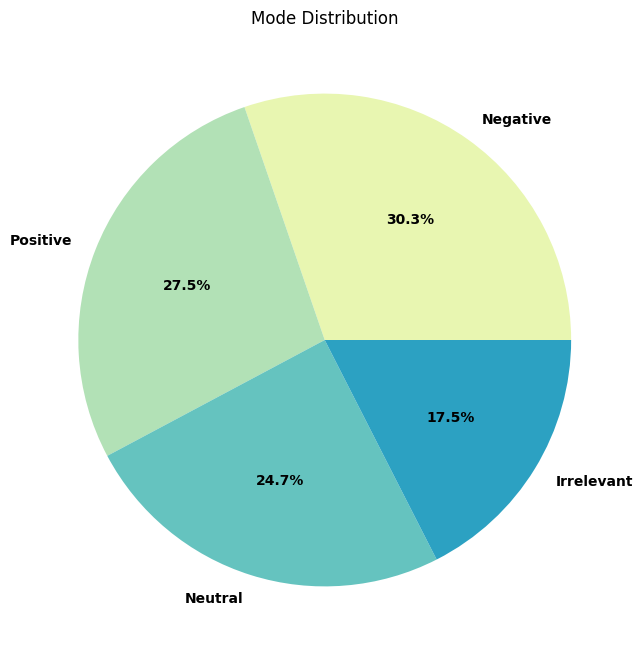

In [29]:
plt.figure(figsize=(10,8))
plt.pie(x = mode.values , labels=mode.keys() ,autopct="%1.1f%%" ,
textprops={"fontsize":10,"fontweight":"black"},colors=sns.color_palette("YlGnBu"))
plt.title('Mode Distribution')
plt.show()

In [30]:
sentiment_label = df.Mode.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype='object'))

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = df.Tweets.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [34]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'to': 3,
 'and': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'in': 8,
 'for': 9,
 'this': 10,
 'it': 11,
 'you': 12,
 'on': 13,
 'my': 14,
 'that': 15,
 'com': 16,
 'with': 17,
 'game': 18,
 'so': 19,
 'be': 20,
 'me': 21,
 'have': 22,
 'just': 23,
 'but': 24,
 'not': 25,
 'are': 26,
 'all': 27,
 'at': 28,
 'was': 29,
 'like': 30,
 'out': 31,
 'from': 32,
 '2': 33,
 'your': 34,
 'now': 35,
 'get': 36,
 'we': 37,
 'as': 38,
 'pic': 39,
 'twitter': 40,
 'they': 41,
 'has': 42,
 'if': 43,
 'one': 44,
 't': 45,
 'do': 46,
 'about': 47,
 'good': 48,
 'can': 49,
 'play': 50,
 'no': 51,
 'will': 52,
 'an': 53,
 'new': 54,
 'really': 55,
 'when': 56,
 'up': 57,
 'love': 58,
 'unk': 59,
 "i'm": 60,
 'what': 61,
 'more': 62,
 'by': 63,
 'time': 64,
 'johnson': 65,
 'how': 66,
 'people': 67,
 'or': 68,
 'some': 69,
 'why': 70,
 '3': 71,
 'see': 72,
 'shit': 73,
 'co': 74,
 'been': 75,
 "it's": 76,
 'best': 77,
 'still': 78,
 '’': 79,
 'facebook': 80,
 'https': 81,
 'games': 82,
 'got': 

In [35]:
print(tweet[0])
print(encoded_docs[0])

I am coming to the borders and I will kill you all,
[2, 119, 404, 3, 1, 4, 2, 52, 434, 12, 27]


In [36]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2 119 404   3   1   4   2  52 434
  12  27]


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract text and labels
texts = df['Tweets'].tolist()
labels = df['Mode'].tolist()

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels, test_size=0.2, random_state=42)


In [46]:
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')


In [48]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense

embedding_vector_length = 32
vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/Tweets.csv')

# Extract text and labels
texts = df['text'].tolist()
labels = df['airline_sentiment'].tolist()

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, np.array(y_train), epochs=10, batch_size=1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, np.array(y_test))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)